<a href="https://colab.research.google.com/github/faraztrazaky/RLD/blob/main/Heart_Attack_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ankushpanday2_heart_attack_prediction_in_indonesia_path = kagglehub.dataset_download('ankushpanday2/heart-attack-prediction-in-indonesia')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction-in-indonesia/heart_attack_prediction_indonesia.csv


## Title: Predicting Heart Attacks in Indonesia: A Data-Driven Approach

##### Description:
**This study focuses on predicting heart attack risks in Indonesia using machine learning techniques. By analyzing key health indicators, lifestyle factors, and medical history, the model aims to identify high-risk individuals and support early intervention strategies. The insights can help healthcare professionals improve patient outcomes and optimize preventive measures.**

## Import dataset

In [ ]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')

In [ ]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48.0,121.0,101.0,Normal,0.0,0.0,0.0,0.0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58.0,83.0,138.0,Normal,1.0,0.0,1.0,0.0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69.0,130.0,171.0,Abnormal,0.0,1.0,0.0,1.0
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52.0,85.0,146.0,Normal,0.0,1.0,1.0,0.0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59.0,127.0,139.0,Normal,1.0,0.0,1.0,1.0


In [ ]:
df.tail()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
47999,32,Male,Urban,Middle,0,0,187,0,102,0,...,90,121,60.0,120.0,161.0,Normal,0.0,1.0,1.0,0.0
48000,62,Male,Urban,Middle,1,0,175,0,102,0,...,73,70,63.0,102.0,205.0,Normal,0.0,0.0,0.0,0.0
48001,46,Female,Rural,Low,0,0,202,1,95,0,...,79,112,61.0,197.0,281.0,Abnormal,0.0,0.0,1.0,1.0
48002,51,Male,Urban,Low,1,0,229,1,98,0,...,77,77,49.0,153.0,148.0,Normal,0.0,0.0,0.0,1.0
48003,52,Female,Urban,Middle,1,0,225,1,104,1,...,82,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48004 entries, 0 to 48003
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             48004 non-null  int64  
 1   gender                          48004 non-null  object 
 2   region                          48004 non-null  object 
 3   income_level                    48004 non-null  object 
 4   hypertension                    48004 non-null  int64  
 5   diabetes                        48004 non-null  int64  
 6   cholesterol_level               48004 non-null  int64  
 7   obesity                         48004 non-null  int64  
 8   waist_circumference             48004 non-null  int64  
 9   family_history                  48004 non-null  int64  
 10  smoking_status                  48004 non-null  object 
 11  alcohol_consumption             19205 non-null  object 
 12  physical_activity               

In [ ]:
df.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48004.000000,48003.000000,48003.000000,48003.000000,48003.000000,48003.000000,48003.000000,48003.000000
mean,54.510832,0.296309,0.198817,199.466774,0.252333,93.277310,0.302371,6.473628,129.521519,79.514582,110.748188,49.486136,129.847968,149.961711,0.202175,0.497886,0.602900,0.403016
std,11.901254,0.456634,0.399114,39.539405,0.434356,16.452831,0.459290,1.426544,15.097365,10.009082,27.680938,9.990570,34.975117,49.259539,0.401626,0.500001,0.489302,0.490509
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,39.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.485098,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.498404,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,1.000000,104.000000,1.000000,7.517538,140.000000,86.000000,130.000000,56.000000,154.000000,184.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,194.000000,127.000000,229.000000,89.000000,276.000000,349.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
age,int64
gender,object
region,object
income_level,object
hypertension,int64
diabetes,int64
cholesterol_level,int64
obesity,int64
waist_circumference,int64
family_history,int64


In [ ]:
df.shape

(48004, 28)

In [ ]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

## Data visualizations

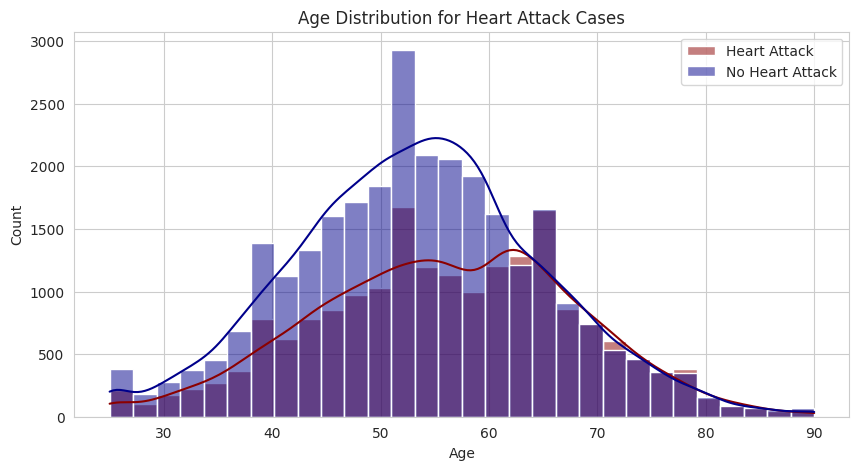

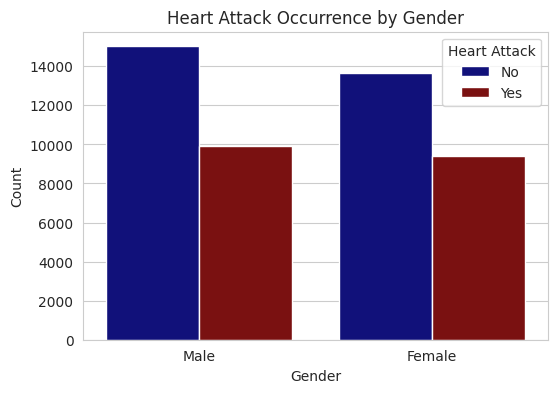

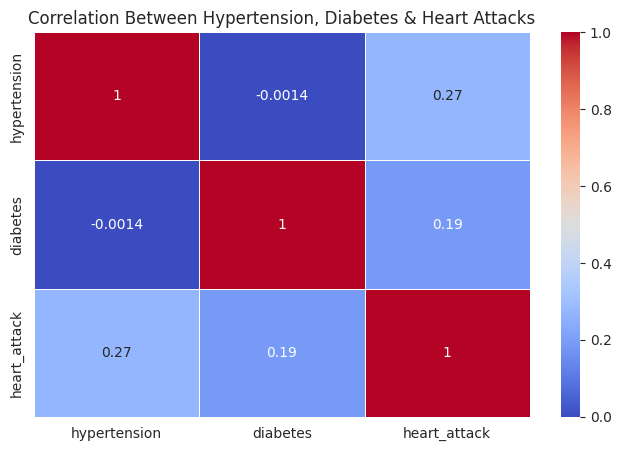

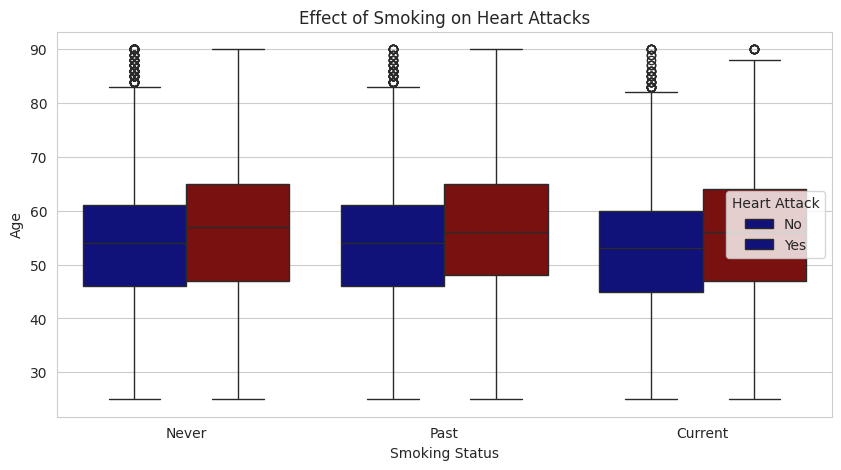

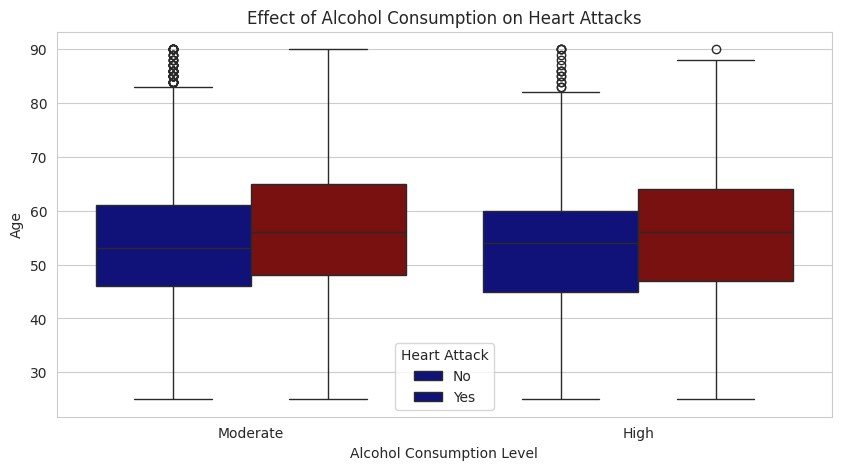

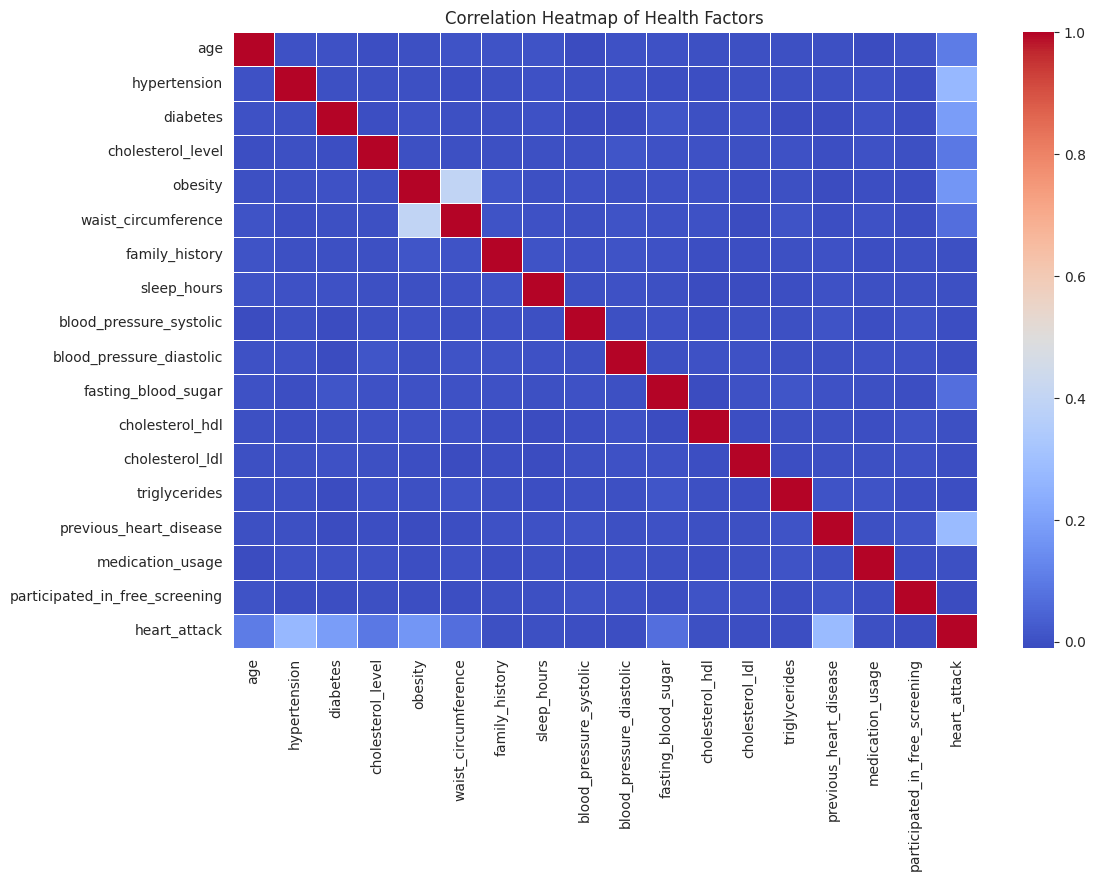

In [ ]:
# Set a consistent style
sns.set_style("whitegrid")

# 1. Age Distribution for Heart Attack Cases
plt.figure(figsize=(10, 5))
sns.histplot(df[df["heart_attack"] == 1]["age"], bins=30, color="darkred", kde=True, label="Heart Attack")
sns.histplot(df[df["heart_attack"] == 0]["age"], bins=30, color="darkblue", kde=True, label="No Heart Attack")
plt.legend()
plt.title("Age Distribution for Heart Attack Cases")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Gender-wise Heart Attack Occurrence
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Heart Attack Occurrence by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

# 3. Hypertension & Diabetes Effect
plt.figure(figsize=(8, 5))
sns.heatmap(df[["hypertension", "diabetes", "heart_attack"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Hypertension, Diabetes & Heart Attacks")
plt.show()

# 4. Smoking & Alcohol Consumption Impact
plt.figure(figsize=(10, 5))
sns.boxplot(x="smoking_status", y="age", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Effect of Smoking on Heart Attacks")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="alcohol_consumption", y="age", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Effect of Alcohol Consumption on Heart Attacks")
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Age")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

# 5. Correlation Heatmap for Key Features
numeric_cols = df.select_dtypes(include=['number']).columns  # Exclude categorical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Health Factors")
plt.show()

## Predictive modeling

Here’s the full machine learning pipeline to process the dataset:

Train-test split (80-20 split)

Label encoding (for categorical variables)

Applying multiple ML models and comparing their accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 2. Handle categorical features using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoders if needed later

In [ ]:
# 3. Define Features & Target
X = df.drop(columns=["heart_attack"])
y = df["heart_attack"]

In [ ]:
# 4. Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Standardize numerical features (Optional for tree models, necessary for SVM, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 6. Initialize ML Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC()
}

In [ ]:
if not np.all(np.isfinite(X_train)):
    print("Warning: Non-finite values found in X_train. Dropping corresponding rows.")
    finite_rows_train = np.all(np.isfinite(X_train), axis=1)
    X_train = X_train[finite_rows_train]
    y_train = y_train[finite_rows_train]

In [ ]:
if not np.all(np.isfinite(X_test)):
    print("Warning: Non-finite values found in X_test. Dropping corresponding rows.")
    finite_rows_test = np.all(np.isfinite(X_test), axis=1)
    X_test = X_test[finite_rows_test]
    y_test = y_test[finite_rows_test]

In [ ]:
# 7. Train and Evaluate Models
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy


In [ ]:
# 8. Display Accuracy Results
accuracy_df = pd.DataFrame(accuracy_results.items(), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

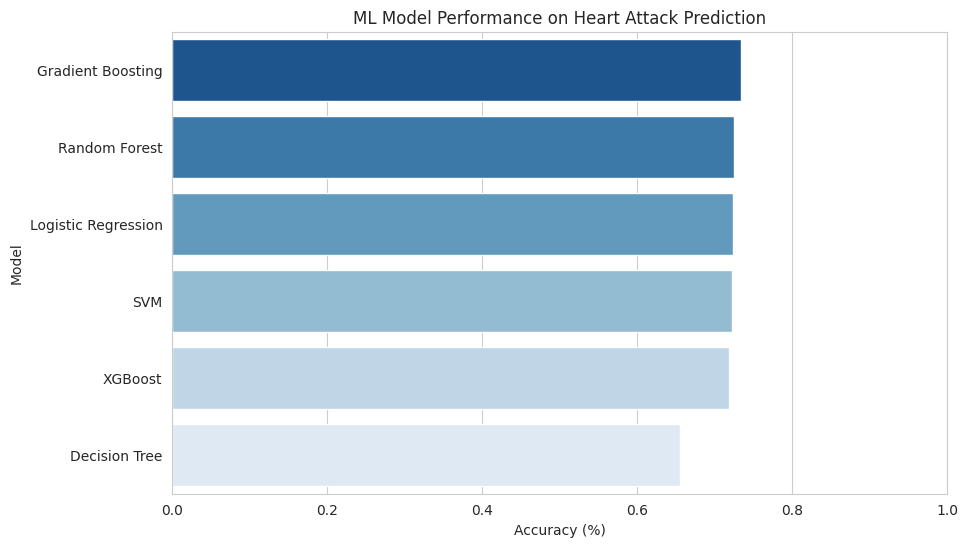

In [ ]:
# 9. Visualization - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="Blues_r")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("ML Model Performance on Heart Attack Prediction")
plt.xlim(0, 1)  # Set limits from 0 to 1
plt.show()

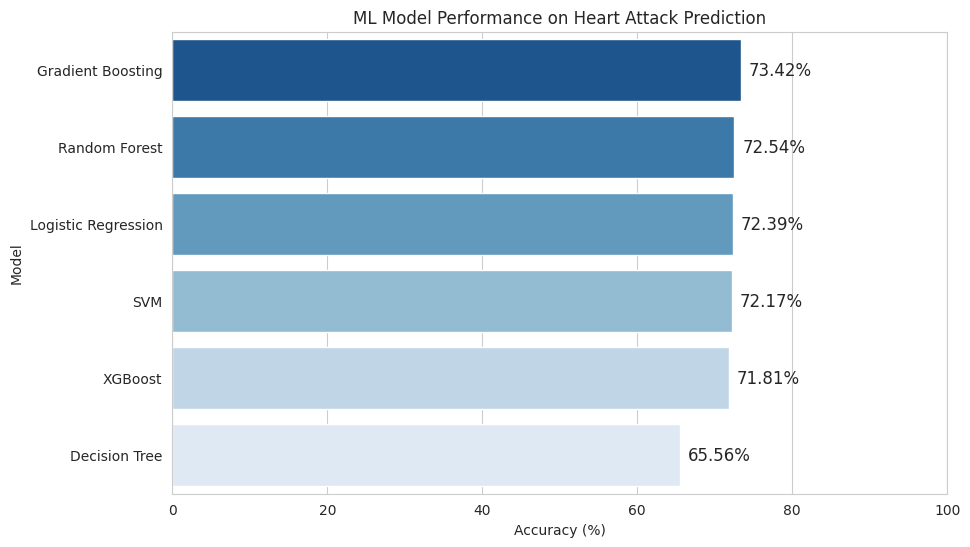

In [ ]:
accuracy_df["Accuracy"] = accuracy_df["Accuracy"] * 100

# Visualization - Bar Chart with Percentage
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="Blues_r")

# Show percentage labels on bars
for index, value in enumerate(accuracy_df["Accuracy"]):
    plt.text(value + 1, index, f"{value:.2f}%", va="center", fontsize=12)

plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("ML Model Performance on Heart Attack Prediction")
plt.xlim(0, 100)  # Set limits from 0 to 100
plt.show()